In [14]:
import re
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Bio import SeqIO, Entrez
import py3Dmol

from dotenv import load_dotenv
env_file = '/home/yuan/bio/bio_omics/src/pipelines/.env'
load_dotenv(dotenv_path = env_file)

%load_ext autoreload
%autoreload 2

src_dir = os.path.dirname(os.getcwd())
print('src direcotry is ', src_dir)
bioomics_dir = '/home/yuan/bio/bio_omics/src'
for _dir in (src_dir, bioomics_dir):
    if _dir not in sys.path:
        sys.path.append(_dir)
print(sys.path)

from bioomics import QueryComplex
from plot_seq import PlotSeq

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
src direcotry is  /home/yuan/bio/predict_antibody
['/home/yuan/bio/localcolabfold/localcolabfold/colabfold-conda/lib/python310.zip', '/home/yuan/bio/localcolabfold/localcolabfold/colabfold-conda/lib/python3.10', '/home/yuan/bio/localcolabfold/localcolabfold/colabfold-conda/lib/python3.10/lib-dynload', '', '/home/yuan/bio/localcolabfold/localcolabfold/colabfold-conda/lib/python3.10/site-packages', '/home/yuan/bio/predict_antibody', '/home/yuan/bio/bio_omics/src']


In [15]:
query = "select * from view_antibody;"
df = QueryComplex(True).list_data(query, True)
df['specie'] = df['specie'].map(lambda x: x.replace('_', ' '))
chain_types = {'H': 'Heavy', 'K': 'Kappa', 'L': 'Lambda',}
df['chain_type'] = df['chain_type'].map(lambda x: chain_types[x] if x in chain_types else x)
print(len(df))
df.head()

31529


,allele_name,specie,gene_name,gene_family,chain_type,pdb_id,chain_id,model_no,chain_no,pro_id,chain_seq,pro_len,release_date,structure_method,resolution,avg_bfactor,relative_faa,relative_pdb,pdb_group
0,IGKV8-21*01,Mus musculus,IGKV8-21,IGKV8,Kappa,3IJH,3IJH_0_A_0,0,A,143006,IVMTQSPSSLAVSAGEKVTMSCKSSQSLLNSRTRKNYLAWYQQKPG...,217,2009-10-06,x-ray diffraction,2.10,27.2235,meta_chain_faa/3I/3IJH/3IJH_0_A_0.faa,meta_chain_pdb/3I/3IJH/3IJH_0_A_0.pdb,0.0
1,IGHV7-3*02,Mus musculus,IGHV7-3,IGHV7,Heavy,3IJH,3IJH_0_B_0,0,B,148148,EVMLVESGGGLVQPGNSLRLSCATSGFTFTDYYMSWVRQPPGKALE...,221,2009-10-06,x-ray diffraction,2.10,29.0730,meta_chain_faa/3I/3IJH/3IJH_0_B_0.faa,meta_chain_pdb/3I/3IJH/3IJH_0_B_0.pdb,0.0
2,IGKV8-21*01,Mus musculus,IGKV8-21,IGKV8,Kappa,3IJH,3IJH_0_C_0,0,C,143006,IVMTQSPSSLAVSAGEKVTMSCKSSQSLLNSRTRKNYLAWYQQKPG...,217,2009-10-06,x-ray diffraction,2.10,34.2494,meta_chain_faa/3I/3IJH/3IJH_0_C_0.faa,meta_chain_pdb/3I/3IJH/3IJH_0_C_0.pdb,0.0
3,IGHV7-3*02,Mus musculus,IGHV7-3,IGHV7,Heavy,3IJH,3IJH_0_D_0,0,D,148148,EVMLVESGGGLVQPGNSLRLSCATSGFTFTDYYMSWVRQPPGKALE...,221,2009-10-06,x-ray diffraction,2.10,30.9271,meta_chain_faa/3I/3IJH/3IJH_0_D_0.faa,meta_chain_pdb/3I/3IJH/3IJH_0_D_0.pdb,0.0
4,IGKV1-21*01,Macaca mulatta,IGKV1-21,IGKV1,Kappa,9IJS,9IJS_0_H_0,0,H,152834,VQLVESGGGLVQPGGSLRLSCAASGFNVYSSSIHWVRQAPGKGLEW...,225,2025-09-03,electron microscopy,3.64,119.2310,meta_chain_faa/9I/9IJS/9IJS_0_H_0.faa,meta_chain_pdb/9I/9IJS/9IJS_0_H_0.pdb,0.0


In [16]:
df['specie'].value_counts()

specie
Homo sapiens             14462
Mus musculus              9073
Vicugna pacos             3278
Macaca mulatta            1348
Gorilla gorilla           1074
Pongo pygmaeus             595
Oryctolagus cuniculus      483
Pongo abelii               367
Rattus norvegicus          274
Bos taurus                 159
Macaca fascicularis        116
Lemur catta                110
Gallus gallus               75
Sus scrofa                  52
Mus spretus                 24
Canis lupus                 12
Mustela putorius             8
Felis catus                  7
Camelus dromedarius          5
Equus caballus               3
Capra hircus                 2
Ovis aries                   2
Name: count, dtype: int64

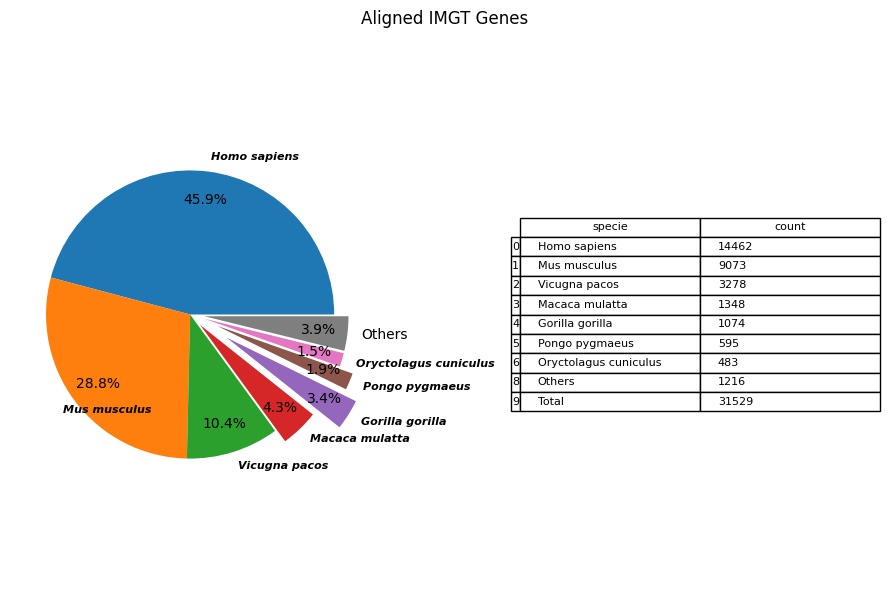

In [17]:
n = 7
explode = [0, 0, 0, .1, .3, .2, .1, .1]
args = {'angle': 0, 'ha': 'left', 'pctdistance':.8, 'labeldistance':1.1, }
PlotSeq.pie_species(df, n, explode, args)

['Homo sapiens', 'Mus musculus']


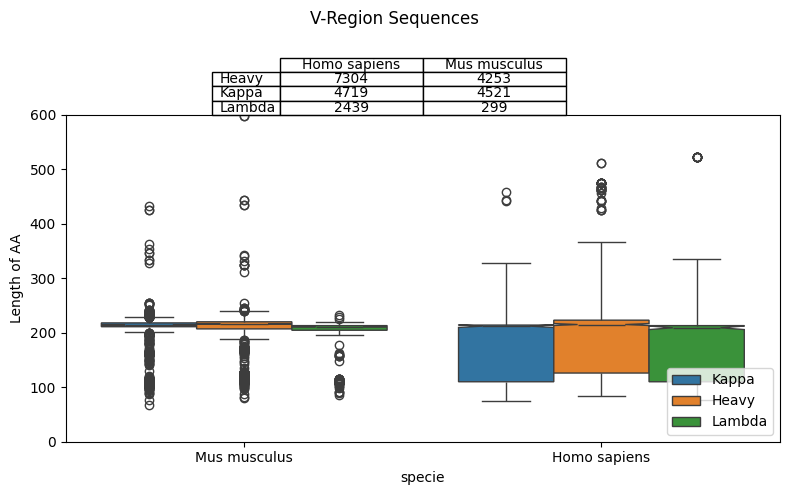

(         allele_name        specie   gene_name gene_family chain_type pdb_id  \
 0        IGKV8-21*01  Mus musculus    IGKV8-21       IGKV8      Kappa   3IJH   
 1         IGHV7-3*02  Mus musculus     IGHV7-3       IGHV7      Heavy   3IJH   
 2        IGKV8-21*01  Mus musculus    IGKV8-21       IGKV8      Kappa   3IJH   
 3         IGHV7-3*02  Mus musculus     IGHV7-3       IGHV7      Heavy   3IJH   
 5        IGHV3-48*03  Homo sapiens    IGHV3-48       IGHV3      Heavy   9IJE   
 ...              ...           ...         ...         ...        ...    ...   
 31522   IGKV1-110*01  Mus musculus   IGKV1-110       IGKV1      Kappa   5Y9F   
 31524    IGHV3-53*01  Homo sapiens    IGHV3-53       IGHV3      Heavy   9CFF   
 31525  IGHV5-10-1*01  Homo sapiens  IGHV5-10-1       IGHV5      Heavy   5DUM   
 31527   IGKV1-110*01  Mus musculus   IGKV1-110       IGKV1      Kappa   5B6F   
 31528     IGHV5-9*03  Mus musculus     IGHV5-9       IGHV5      Heavy   1BLN   
 
          chain_id  model_

In [18]:
top_names = list(df['specie'].value_counts()[:2].index)
print(top_names)
sdf = df[df['specie'].isin(top_names)]
PlotSeq.plot_summary(sdf)

### human

(14462, 19)


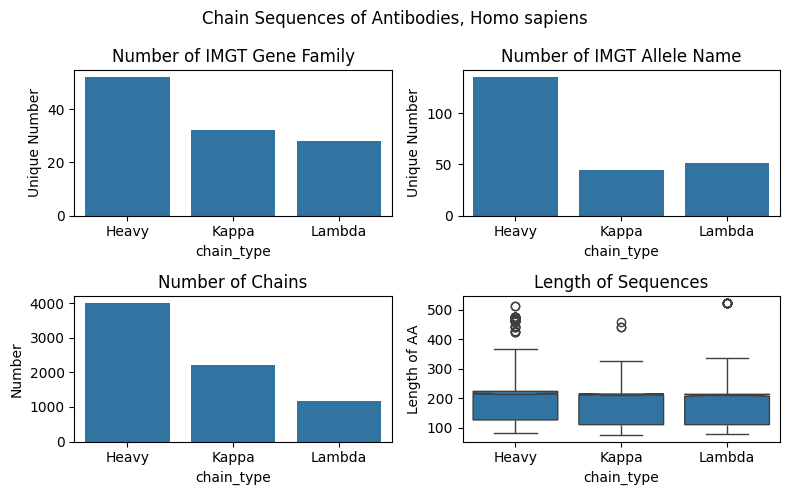

In [19]:
specie = "Homo sapiens"
PlotSeq.plot_summary_specie(df, specie)

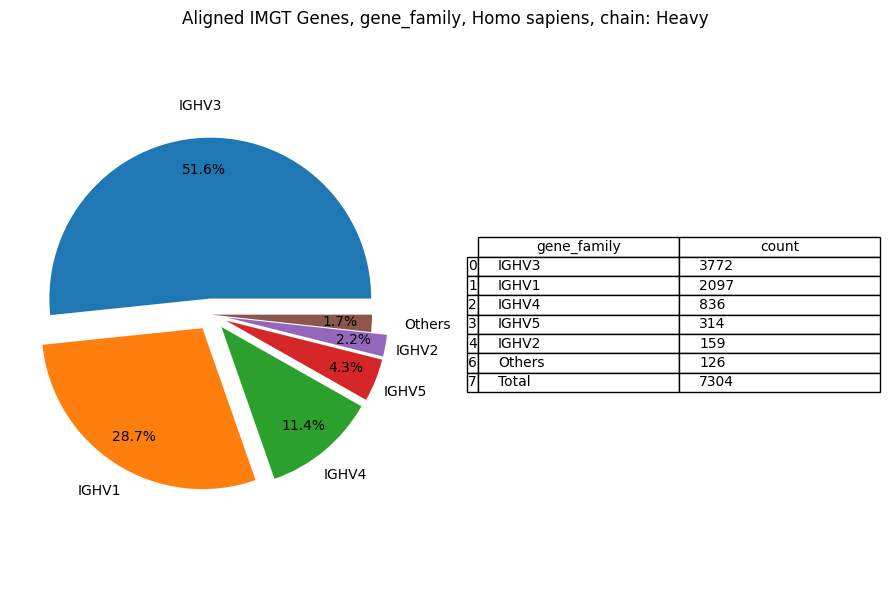

In [20]:
# most abundant IMGT gene names
specie = "Homo sapiens"
chain_type = 'Heavy'
key = 'gene_family'
n = 5
args = {'explode_unit': .1, 'angle':0, 'ha':'center', 'pctdistance':.8,}
PlotSeq.pie_gene(df, specie, chain_type, key, n, args)

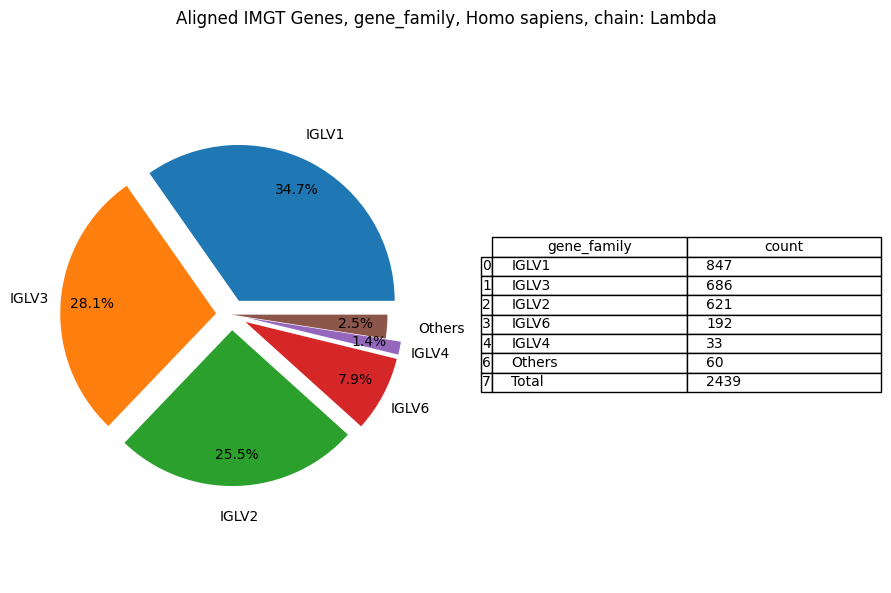

In [21]:
# most abundant IMGT gene names
specie = "Homo sapiens"
chain_type = 'Lambda'
key = 'gene_family'
n = 5
args = {'explode_unit': .1, 'angle':0, 'ha':'center', 'pctdistance':.8,}
PlotSeq.pie_gene(df, specie, chain_type, key, n, args)

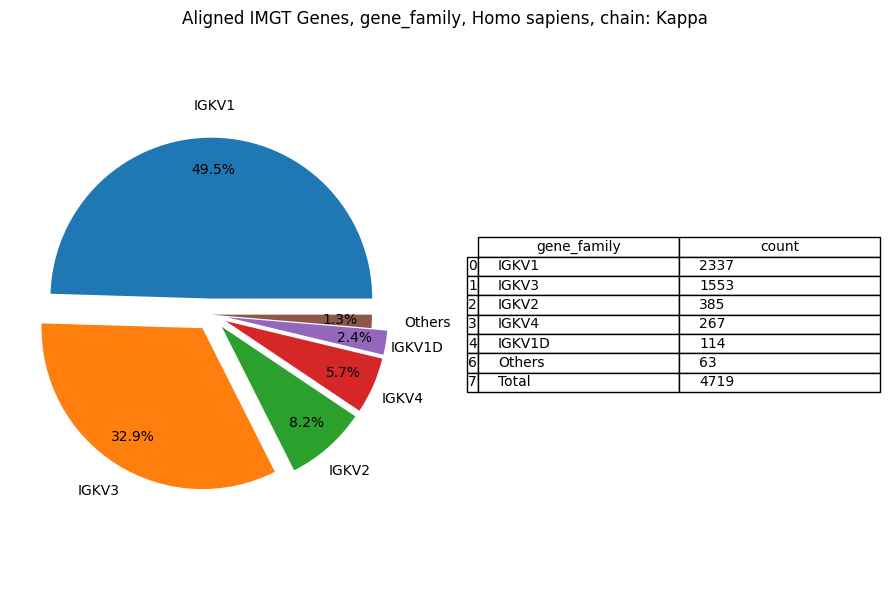

In [22]:
# most abundant IMGT gene names
specie = "Homo sapiens"
chain_type = 'Kappa'
key = 'gene_family'
n = 5
args = {'explode_unit': .1, 'angle':0, 'ha':'center', 'pctdistance':.8,}
PlotSeq.pie_gene(df, specie, chain_type, key, n, args)

### mouse

(9073, 19)


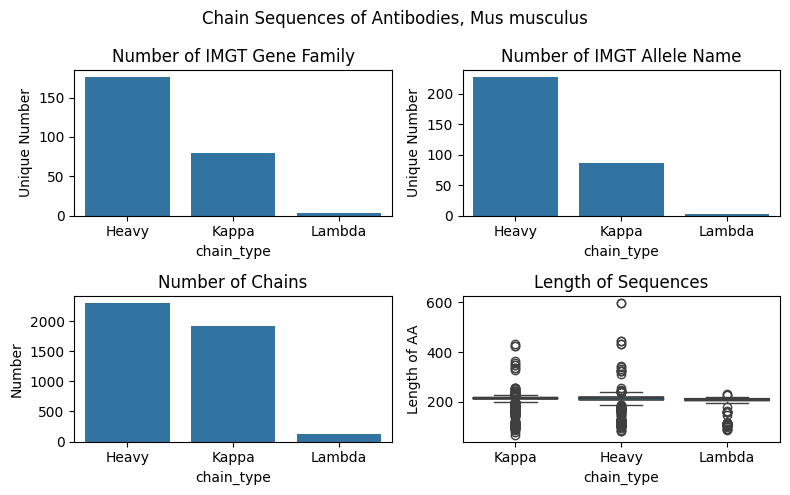

In [23]:
specie = "Mus musculus"
PlotSeq.plot_summary_specie(df, specie)

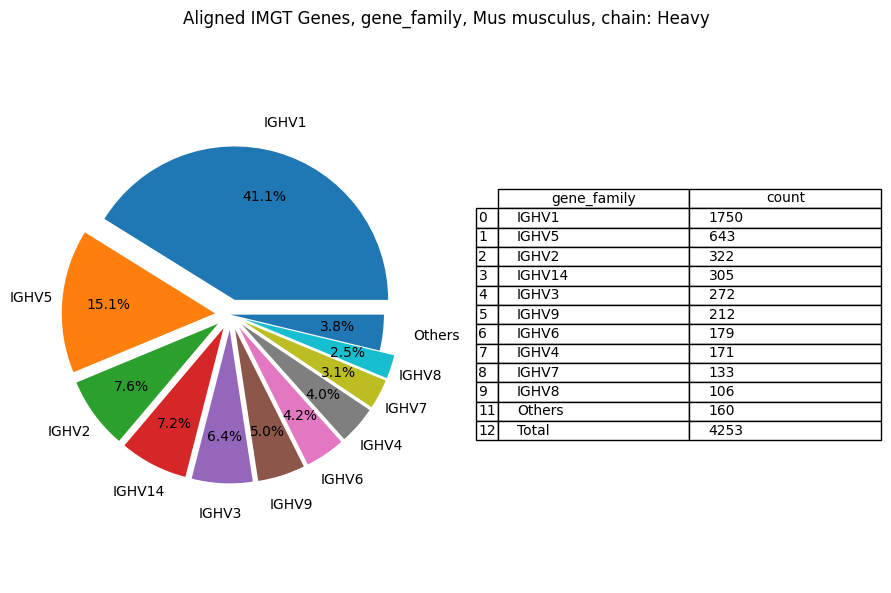

In [24]:
# most abundant IMGT gene names
specie = "Mus musculus"
chain_type = 'Heavy'
key = 'gene_family'
n = 10
args = {'explode_unit': 0.1, 'angle':0, 'ha':'center', 'pctdistance':.7,}
PlotSeq.pie_gene(df, specie, chain_type, key, n, args)

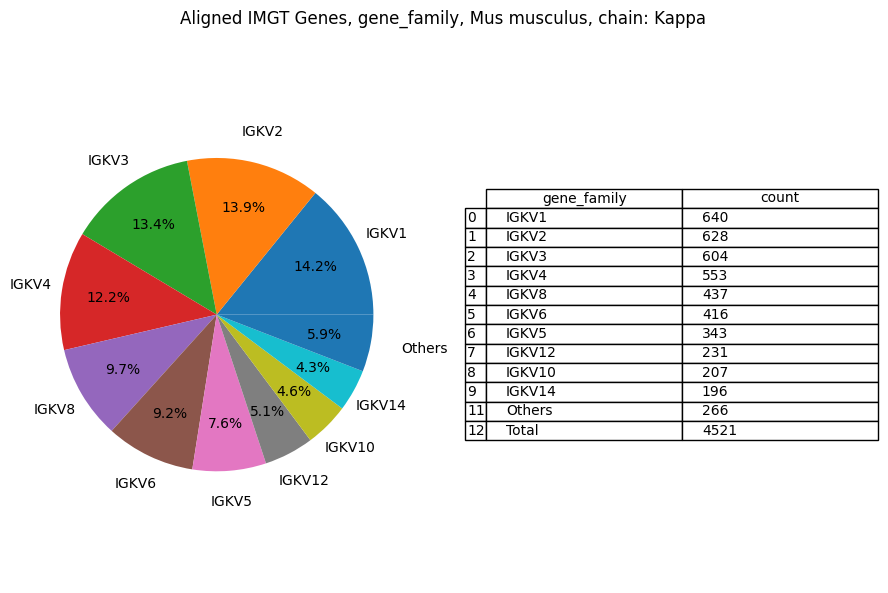

In [25]:
specie = "Mus musculus"
chain_type = 'Kappa'
key = 'gene_family'
n = 10
args = {'explode_unit': 0, 'angle':0, 'ha':'center', 'pctdistance':.7,}
PlotSeq.pie_gene(df, specie, chain_type, key, n, args)

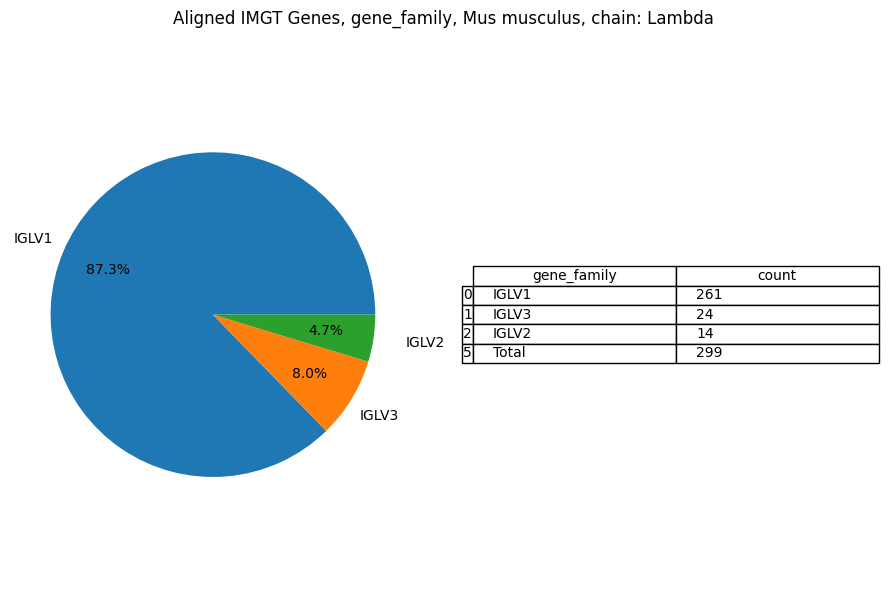

In [26]:
specie = "Mus musculus"
chain_type = 'Lambda'
key = 'gene_family'
n = 3
args = {'explode_unit': 0, 'angle':0, 'ha':'center', 'pctdistance':.7, 'labeldistance':1.2}
PlotSeq.pie_gene(df, specie, chain_type, key, n, args)